# Data-Driven Decision Making: Analysis of Retail Sales Records

## About Dataset

This dataset contains purchase records with customer value based on product, store location, and price. Looker Studio and graphic visualization are used to gain better insights.

### 1. Overview of the Dataset

In [458]:
#import dataset using pandas
import pandas as pd
df_retail = pd.read_csv('Retail_Transaction_Dataset.csv')
df_retail.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.080,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677,455.863
1,993229,C,4,75.195,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121,258.307
2,579675,A,8,31.529,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.944,212.016
3,799826,D,5,98.880,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686,461.344
4,121413,A,7,93.189,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030,626.030


#### Summary Dataset

Target : <br>
Column :

## Data Preparation

### Data Cleaning

Data cleaning involves identifying incomplete values in the table. Use the count() function to clean up your data. The count() function determines the number of values in each column. If a column contains null, the columns are not identical.

In [459]:
df_retail.count()

CustomerID            100000
ProductID             100000
Quantity              100000
Price                 100000
TransactionDate       100000
PaymentMethod         100000
StoreLocation         100000
ProductCategory       100000
DiscountApplied(%)    100000
TotalAmount           100000
dtype: int64

If you are unsure about the outcome of using count(), you can use the more detailed info() function. The drawback of the info() function is that it consumes more memory than count().

In [460]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


To enable trend visualization, the TransactionDate column is converted from data type object to datetime using the to_datetime function in a predefined format.

## Stage 1

### Exploratory Data Analysist

Exploratory Data Analysis (EDA) is a technique used to understand the structure, characteristics, and patterns in data before proceeding with further analysis or building predictive models. EDA helps identify anomalies, check assumptions, discover relationships between variables, and inform subsequent analysis steps.

#### 1. Descriptive Statistics

<b>Mean, Median, Mode :</b> <br>Measure the central tendency of the data. <br><br>
<b>Range, Variance, Standard Deviation :</b> <br>Measure the dispersion or variation in the data.

In [461]:
#check dataset features and target 
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [462]:
# Function to check mean values
def mean(x):
    return '{:,.3f}'.format(x.mean())

# Funtion to check median values
def median(x):
    return '{:,.3f}'.format(x.median())

# Function to check mode values
def mode(x):
    return '{:,.3f}'.format(x.mode().iloc[0])

# Function to check interquartile
def interquartile(x):
    result = x.quantile(0.75) - x.quantile(0.25)
    return result

# Function to check standard deviation
def standard_dev(x):
    return '{:,.0f}'.format(x.std()) 

# Function to check max outliers
def outliers_max(x):
    outliers = 1.5 * interquartile(x)
    result = x.quantile(0.25)-outliers
    return result

# Function to check min outliers
def outliers_min(x):
    outliers = 1.5 * interquartile(x)
    result = x.quantile(0.75)-outliers
    return result

In [463]:
df_retail.select_dtypes(include=['int', 'float']).agg(['median', mode, interquartile, standard_dev, outliers_max, outliers_min]).reset_index()

,index,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
0,median,"499,679.000",5.000,55.117,10.030,200.368
1,mode,"340,516.000",7.000,10.000,0.000,101.718
2,interquartile,"500,411.000",4.000,44.907,10.017,266.847
3,standard_dev,"288,461",3,26,6,185
4,outliers_max,"-499,922.750",-3.000,-34.811,-10.025,-305.106
5,outliers_min,488.250,1.000,10.096,-0.008,-38.260


In [464]:
pd.options.display.float_format = '{:,.3f}'.format
df_retail.describe()

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,"100,000.000","100,000.000","100,000.000","100,000.000","100,000.000"
mean,"500,463.982",5.009,55.067,10.020,248.335
std,"288,460.918",2.580,25.972,5.780,184.555
min,14.000,1.000,10.000,0.000,8.275
25%,"250,693.750",3.000,32.549,5.001,95.163
50%,"499,679.000",5.000,55.117,10.030,200.368
75%,"751,104.750",7.000,77.457,15.018,362.010
max,"999,997.000",9.000,99.999,20.000,896.141


##### Summary Descriptive Analyst

=====Comming soon=====

#### 2. Univriate Analysist
Univariate analysis involves the examination of a single variable. It focuses on describing the distribution, central tendency, and dispersion of that variable.

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'DiscountApplied(%)'}>],
       [<Axes: title={'center': 'TotalAmount'}>, <Axes: >]], dtype=object)

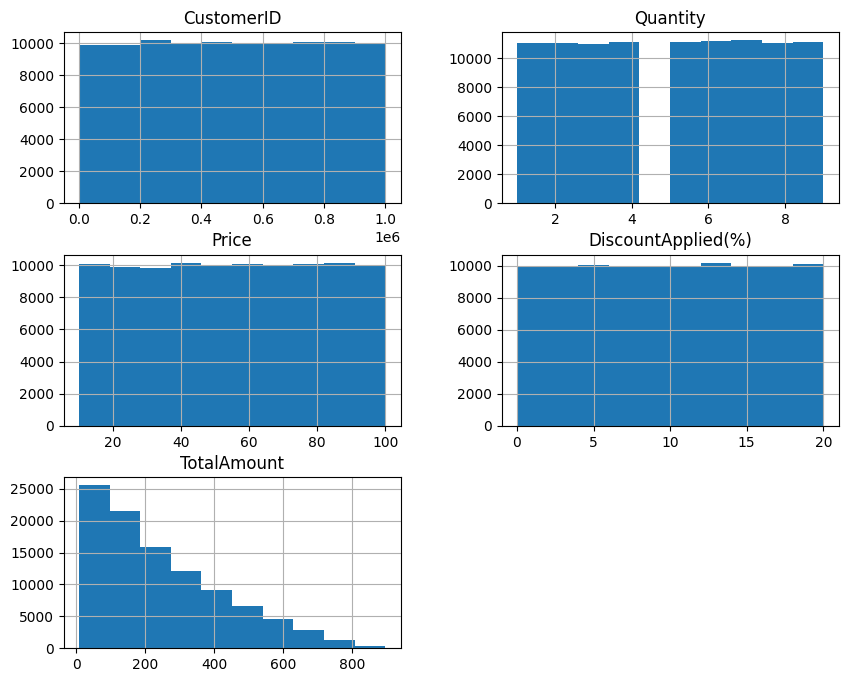

In [465]:
import seaborn as sns
import matplotlib.pyplot as plt
df_retail.hist(figsize=(10,8))

##### Summary Univariate Analyst
====Coming Soon====

#### 3. Multivariate Analysist
Multivariate analysis involves the examination of more than one variable at the same time. It explores relationships and interactions between multiple variables.

In [466]:
import datetime
df_retail['TransactionDate'] = pd.to_datetime(df_retail['TransactionDate'], format='%m/%d/%Y %H:%M')

The info() function returned no null values in any of the columns. So we can start processing the data right away to gain insight. The first step is to examine the table's structure, which can be accessed using the head() function.

In [467]:
df_retail.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.080,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677,455.863
1,993229,C,4,75.195,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121,258.307
2,579675,A,8,31.529,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.944,212.016
3,799826,D,5,98.880,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686,461.344
4,121413,A,7,93.189,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030,626.030


#### 4. Customer Segmentation

To clearly see customer groups, we can divide them according to their ordering habits. The simpler ones are based on ProductCategory, PaymentMethod, and Product ID.

##### 4.1 ProductID segmentation

In [468]:
productid_segment = df_retail.groupby(['ProductID']).agg({'Quantity':'sum'})
productid_segment = productid_segment.rename(columns={'Quantity':'sum'}).reset_index()

<Figure size 1200x800 with 0 Axes>

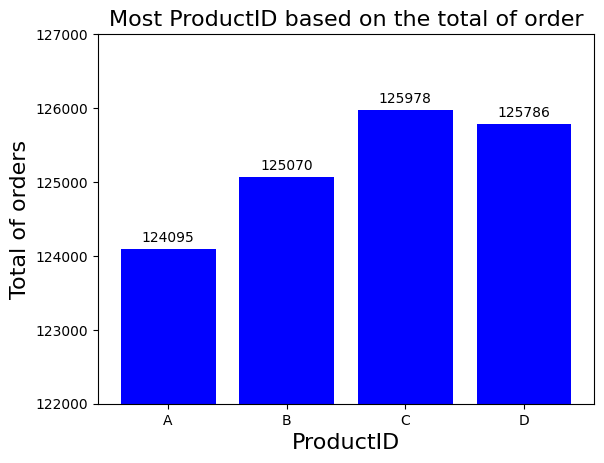

In [469]:
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
bars = ax.bar(productid_segment['ProductID'], productid_segment['sum'], color='blue')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',  # format the label as integer
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('ProductID', fontsize=16)
ax.set_ylabel('Total of orders', fontsize=16)
ax.set_title('Most ProductID based on the total of order', fontsize=16)
plt.ylim(122000, 127000)

plt.show()

ProductID C, D, and B have the most customers who have placed orders, followed by ProductID A. The ProductID calculations are performed by aggregating the sum against the Quantity for each CustomerID. When compared to the highest profit generated by ProductID, you can use aggregation in TotalAmount.

In [470]:
productid_segment['TotalAmount'] = df_retail.groupby('ProductID').agg({'TotalAmount':'sum'}).reset_index()['TotalAmount']

<Figure size 1200x800 with 0 Axes>

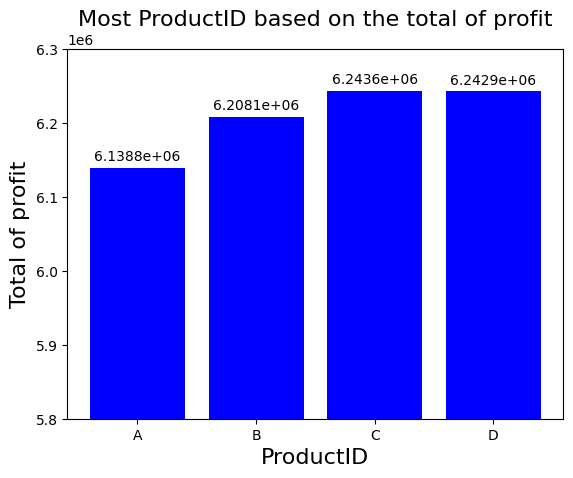

In [471]:
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
bars = ax.bar(productid_segment['ProductID'], productid_segment['TotalAmount'], color='blue')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.5}',  # format the label as scientific notation with 2 decimals
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('ProductID', fontsize=16)
ax.set_ylabel('Total of profit', fontsize=16)
ax.set_title('Most ProductID based on the total of profit', fontsize=16)
plt.ylim(5.8e+06, 6.3e+06)

plt.show()

Based on TotalAmount, the ProductIDs that generate the most profit are C, D, B, and A. To obtain the TotalAmount for each ProductID, group by ProductID and apply aggregate sum() to each TotalAmount.

Based on the two plots of Number of Orders and Total Profit, it generates a direct comparison of Total Orders and Total Profit.

In [472]:
trend_productid = df_retail.groupby(['TransactionDate', 'ProductID']).agg({'TotalAmount':'sum', 'Quantity':'sum'}).reset_index()
trend_productid['TransactionMonthYear'] = trend_productid['TransactionDate'].dt.to_period('M').astype(str)
trend_productid = trend_productid.groupby('TransactionMonthYear').agg({'TotalAmount':'sum', 'Quantity':'sum'}).reset_index()

In [473]:
trend_productid['totalamount (%)'] = trend_productid['TotalAmount']/trend_productid['TotalAmount'].sum()*100
trend_productid['quantity (%)'] = trend_productid['Quantity']/trend_productid['Quantity'].sum()*100

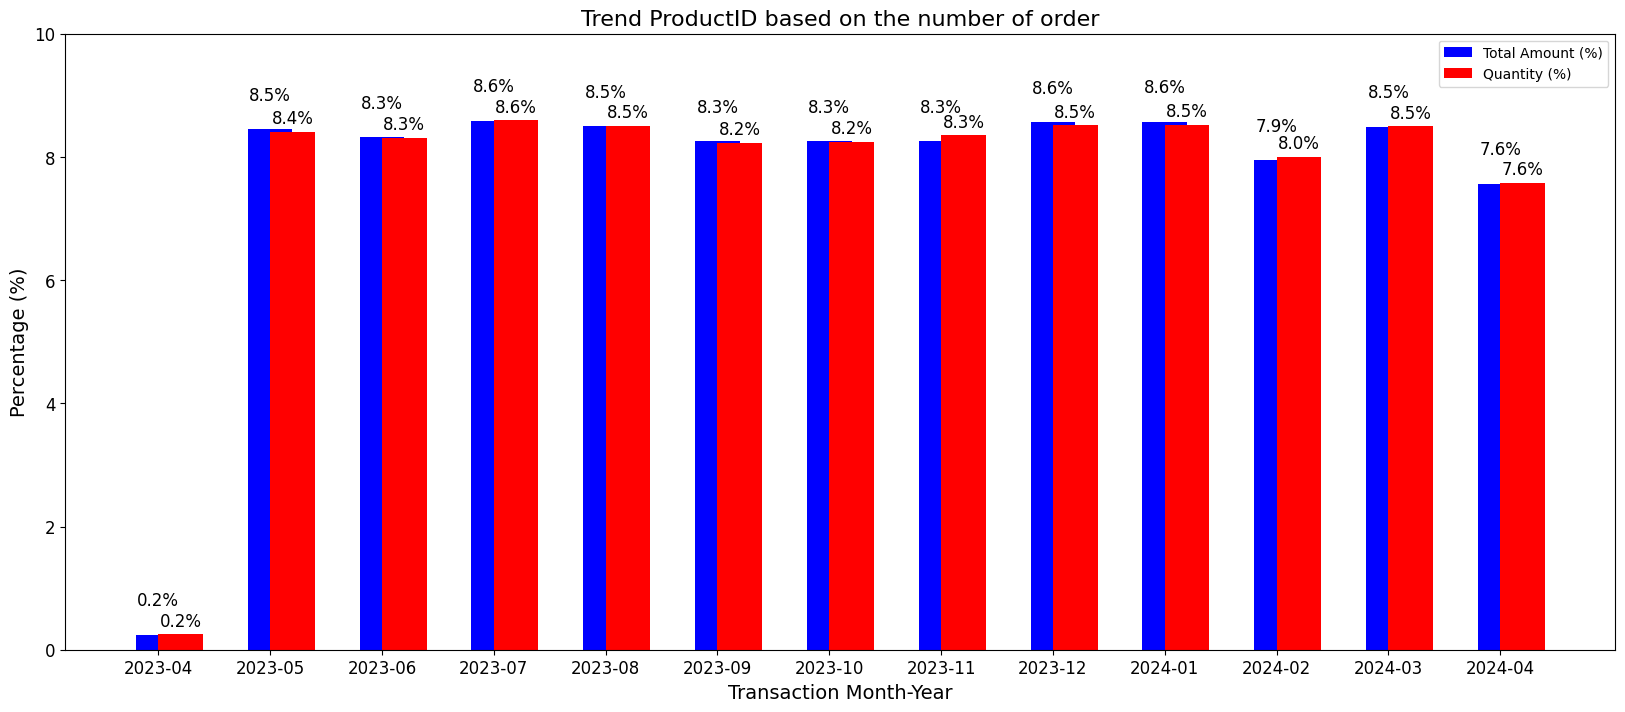

In [474]:
plt.figure(figsize=(20, 8))

bar1 = plt.bar(trend_productid['TransactionMonthYear'], trend_productid['totalamount (%)'], color='blue', width=0.4, align='center')
bar2 = plt.bar(trend_productid['TransactionMonthYear'], trend_productid['quantity (%)'], color='red', width=0.4, align='edge')

plt.title('Trend ProductID based on the number of order', fontsize=16)
plt.xlabel('Transaction Month-Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(['Total Amount (%)', 'Quantity (%)'])

for bar in bar1:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 18),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

for bar in bar2:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)
plt.ylim(0, 10)
plt.show()

The trend represents the level of stability in total customers and total ProductID profit over time. This also demonstrates a straightforward comparison of total customers and total profit.

##### 4.2 PaymentMethod Segmentation

In [475]:
paymethod = df_retail.groupby('PaymentMethod').agg({'Quantity':'sum'}).reset_index()
paymethod = paymethod.rename(columns={'Quantity':'sum'})

<Figure size 1200x800 with 0 Axes>

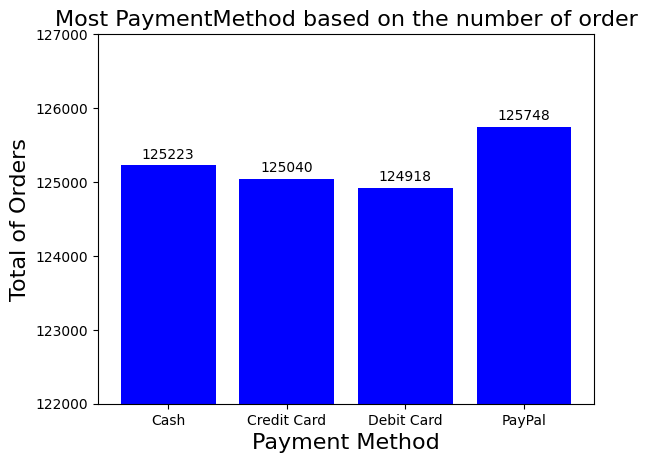

In [476]:
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
bars = ax.bar(paymethod['PaymentMethod'], paymethod['sum'], color='blue')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',  # format the label as integer
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Payment Method', fontsize=16)
ax.set_ylabel('Total of Orders', fontsize=16)
ax.set_title('Most PaymentMethod based on the number of order', fontsize=16)
plt.ylim(122000, 127000)

plt.show()

Based on the number of orders placed, the most popular payment method is PayPal, followed by Cash, Credit Card, and Debit Card.

In [477]:
prodcat_segment = df_retail.groupby(['PaymentMethod']).agg({'Quantity':'sum'})
prodcat_segment = prodcat_segment.rename(columns={'Quantity':'sum'}).reset_index()

In [478]:
prodcat_segment['TotalAmount'] = df_retail.groupby('PaymentMethod').agg({'TotalAmount':'sum'}).reset_index()['TotalAmount']

<Figure size 1800x800 with 0 Axes>

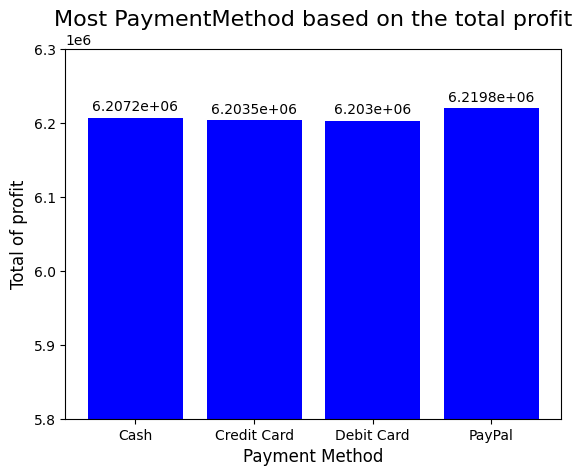

In [479]:
plt.figure(figsize=(18, 8))
fig, ax = plt.subplots()
bars = ax.bar(prodcat_segment['PaymentMethod'], prodcat_segment['TotalAmount'], color='blue')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.5}',  # format the label as scientific notation with 2 decimals
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Total of profit', fontsize=12)
ax.set_title('Most PaymentMethod based on the total profit', fontsize=16)
plt.ylim(5.8e+06, 6.3e+06)

plt.show()

The same thing happens with the payment method for total profit. As more customers use a specific payment method, the profits from that payment method increase.

Payment methods can be seen based on the trends every month.

In [480]:
trend_paymethod = df_retail.groupby(['TransactionDate', 'PaymentMethod']).agg({'TotalAmount':'sum', 'Quantity':'sum'}).reset_index()
trend_paymethod['month_year'] = trend_paymethod['TransactionDate'].dt.to_period('M').astype(str)
trend_paymethod = trend_paymethod.groupby('month_year').agg({'TotalAmount':'sum', 'Quantity':'sum'}).reset_index()

In [481]:
trend_paymethod['totalamount (%)'] = trend_paymethod['TotalAmount']/trend_paymethod['TotalAmount'].sum()*100
trend_paymethod['quantity (%)'] = trend_paymethod['Quantity']/trend_paymethod['Quantity'].sum()*100

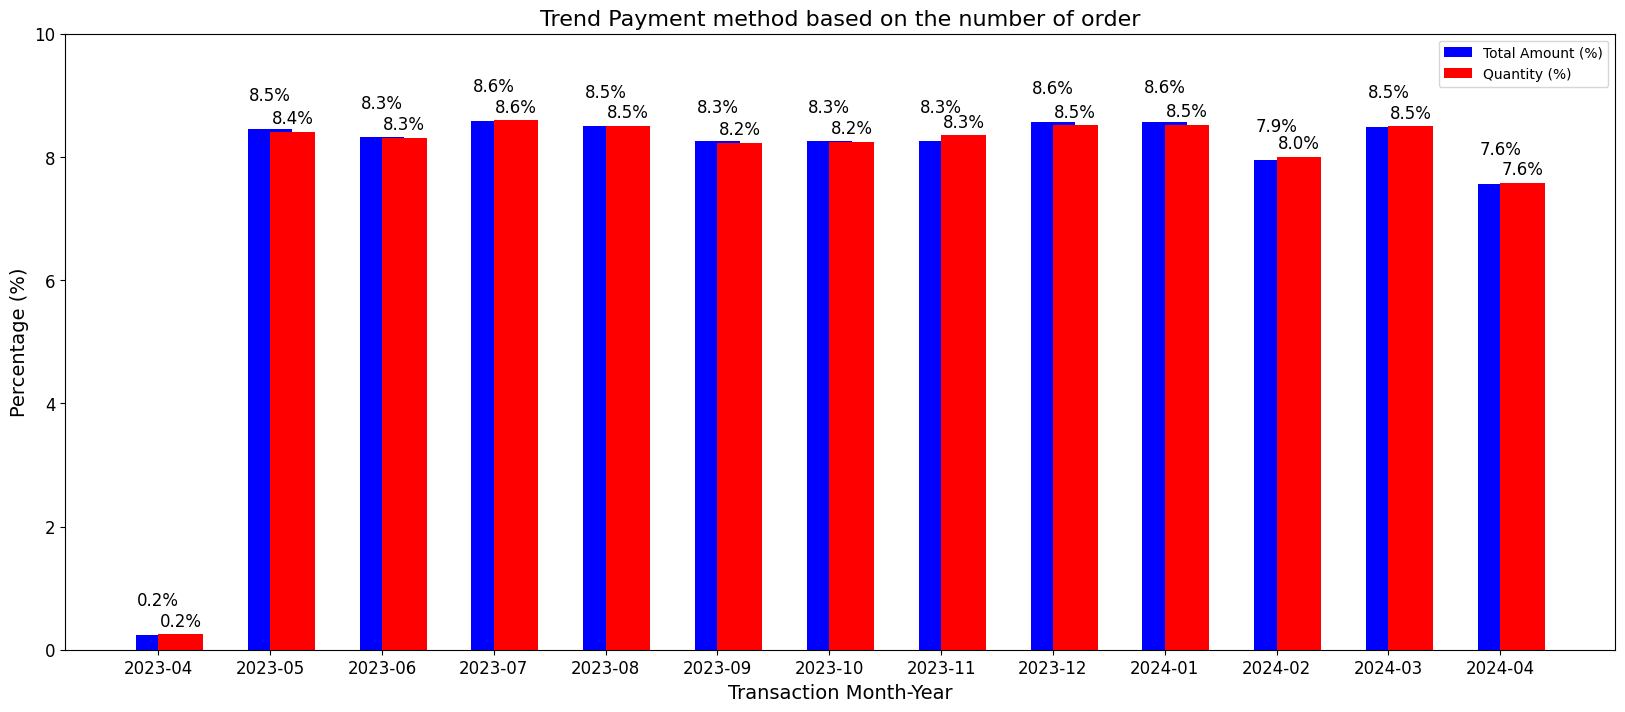

In [482]:
plt.figure(figsize=(20, 8))

bar1 = plt.bar(trend_paymethod['month_year'], trend_paymethod['totalamount (%)'], color='blue', width=0.4, align='center')
bar2 = plt.bar(trend_paymethod['month_year'], trend_paymethod['quantity (%)'], color='red', width=0.4, align='edge')

plt.title('Trend Payment method based on the number of order', fontsize=16)
plt.xlabel('Transaction Month-Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(['Total Amount (%)', 'Quantity (%)'])

for bar in bar1:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 18),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)

for bar in bar2:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=12)
plt.ylim(0, 10)
plt.show()

The Payment method trend produces a graph that is similar to the ProductID trend. This trend demonstrates that each month (Transaction Month-Year) tends to fluctuate between the number of items sold (Quantity) and the total profit (Total Amount) generated through the use of payment methods (Payment Method) or types of goods sold (ProductID).

To make it easier to see, Looker Studio is used as BI (Business Intelligence), and it will be compared to Python as a visualization.

### Calculation Dashboard Looker Studio

Looker Studio Preview <br>
https://lookerstudio.google.com/reporting/71eb6b9b-b93b-4119-92db-01b0ee4a1499

To make it easier to compare Looker Studio's visualizations with Python, the visualizations are limited to transaction records (TransactionDate) from January 2024 to April 2024.

#### 1. Period Jan 2024 - Apr 2024

In [483]:
retail_2024 = df_retail[(df_retail['TransactionDate']>'1-1-2024') & (df_retail['TransactionDate']<'4-2-2024')]

##### 1.1 Total Customer

In [484]:
retail_2024['month'] = retail_2024['TransactionDate'].dt.to_period('M')

C:\Users\User\AppData\Local\Temp\ipykernel_2116\1364547491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_2024['month'] = retail_2024['TransactionDate'].dt.to_period('M')


In [485]:
print('Total Customer period Jan 2024 - Apr 2024 is {:,.0f}'.format(retail_2024.groupby('month').agg({'CustomerID':'count'})['CustomerID'].sum()))

Total Customer period Jan 2024 - Apr 2024 is 25,357


##### 1.2 Quantity

In [486]:
print('Accumullative product sales period Jan 2024 - Apr 2024 is {:,.0f}'.format(retail_2024['Quantity'].sum()))

Accumullative product sales period Jan 2024 - Apr 2024 is 126,715


##### 1.3 Price

In [487]:
print('Acumulative price of product sold before discount is {:,.2f}'.format(retail_2024['Price'].sum()))

Acumulative price of product sold before discount is 1,396,567.01


##### 1.4 Discount Applied (%)

In [488]:
print('Accumulative discount is {:,.2f}'.format(retail_2024['DiscountApplied(%)'].sum()))

Accumulative discount is 255,008.78


##### 1.5 Total Amount

In [489]:
print('Accumulative profit after discount is {:,.2f}'.format(retail_2024['TotalAmount'].sum()))

Accumulative profit after discount is 6,278,714.53


According to the Looker Studio Scorecard, which was recalculated in Python, between January 2024 and April 2024, 25,357 customers made transactions with 126,715 products sold, resulting in a profit of $6,278,714.53. Customers used a discount of 255,008.78 based on sales results from that time period.

##### 1.6 Graph Trend

The resulting trend graph depicts a relationship between the number of customers in that period and the profits generated.

##### 1.7 Trend customerid

In [490]:
group_customerid = df_retail[['TransactionDate', 'CustomerID']]

In [491]:
group_customerid['month'] = df_retail['TransactionDate'].dt.to_period('D')

C:\Users\User\AppData\Local\Temp\ipykernel_2116\3459317133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_customerid['month'] = df_retail['TransactionDate'].dt.to_period('D')


In [492]:
trend_customerid = group_customerid.groupby('month').agg({'CustomerID':'count'}).reset_index()

In [493]:
trend_customerid['customerid(%)'] = trend_customerid['CustomerID']/trend_customerid['CustomerID'].sum() *100

In [494]:
trend_user2024 = trend_customerid[(trend_customerid['month']>'1-2024') & (trend_customerid['month']<'4-2024')]

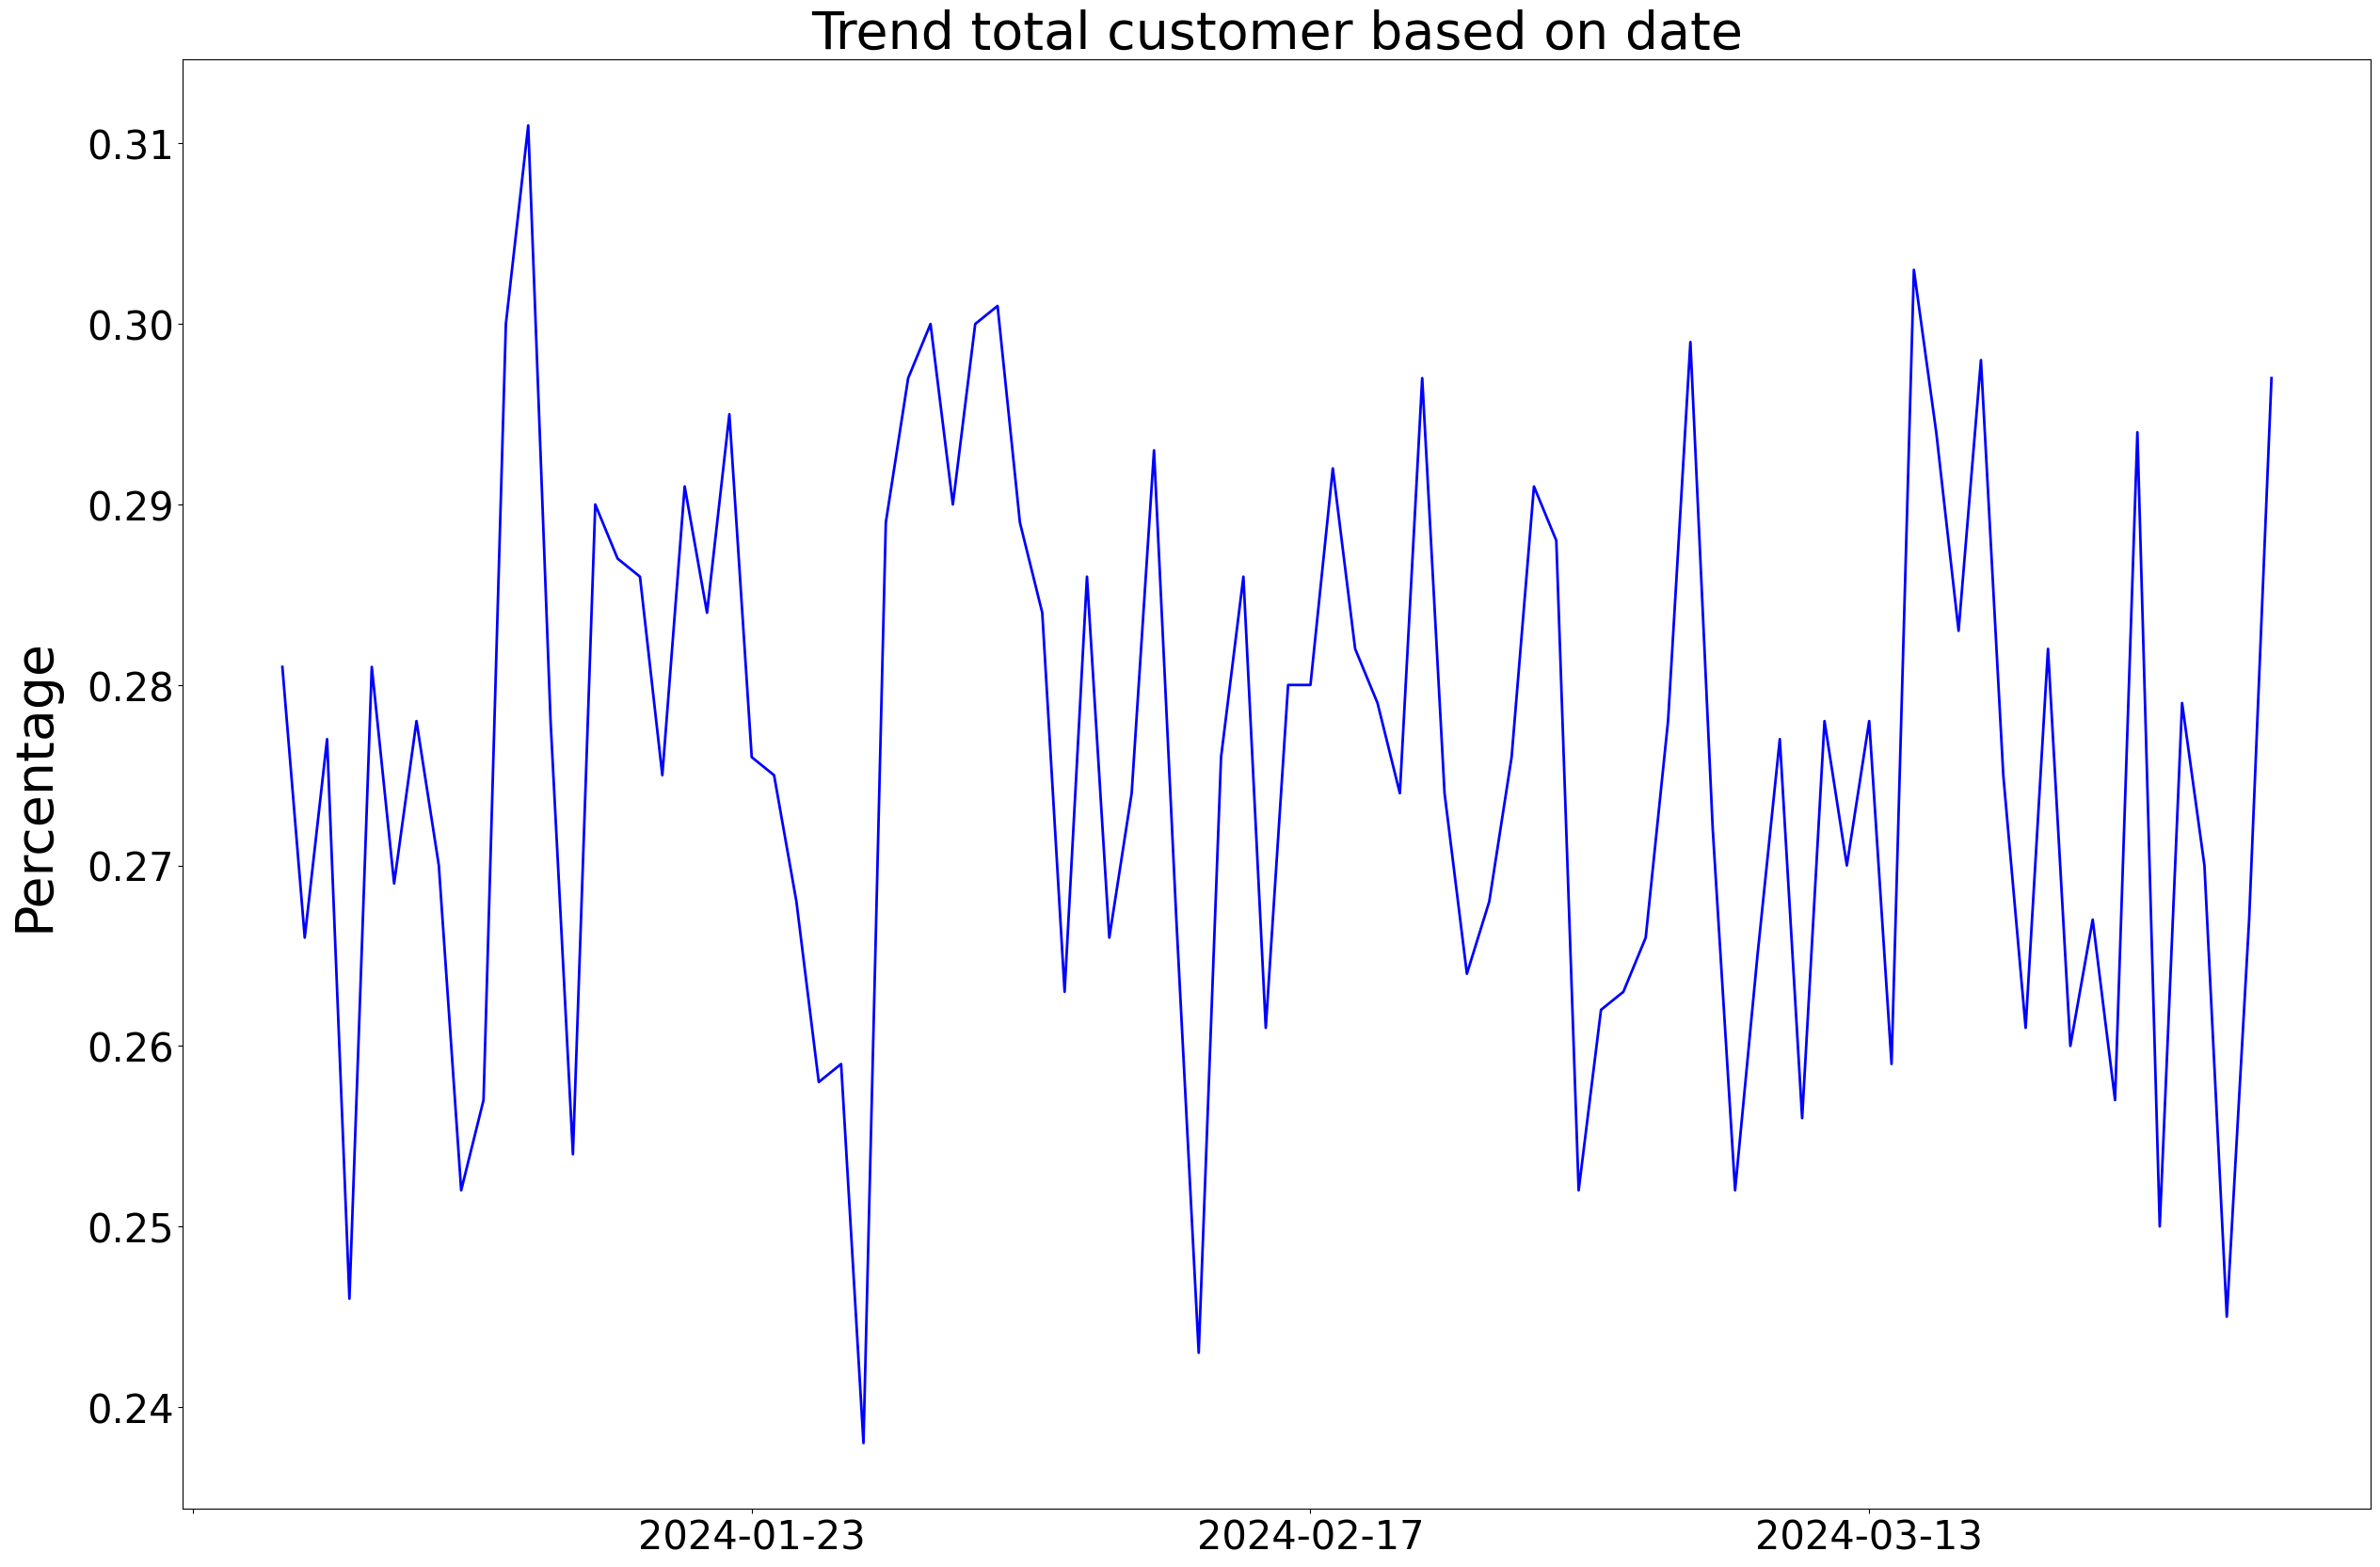

In [495]:
plt.figure(figsize=(30,20))
plt.plot(trend_user2024['month'].astype(str), trend_user2024['customerid(%)'], color='blue', linewidth=2)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=25))

plt.title('Trend total customer based on date', fontsize=40)
# plt.xlabel('Date', fontsize=40)
plt.ylabel('Percentage', fontsize=40)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.yaxis.labelpad = 20

The number of customers who make transactions is represented as a percentage. The trend in terms of the number of customers who made transactions occurred in January.

##### 1.8 Trend total amount

In [496]:
group_totalamount = df_retail[['TransactionDate', 'TotalAmount']]

In [497]:
group_totalamount['month'] = df_retail['TransactionDate'].dt.to_period('D')

C:\Users\User\AppData\Local\Temp\ipykernel_2116\2149894405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_totalamount['month'] = df_retail['TransactionDate'].dt.to_period('D')


In [498]:
trend_totalamount = group_totalamount.groupby('month').agg({'TotalAmount':'count'}).reset_index()

In [499]:
trend_totalamount['totalamount(%)'] = trend_totalamount['TotalAmount']/trend_totalamount['TotalAmount'].sum() *100

In [500]:
trend_amount2024 = trend_totalamount[(trend_totalamount['month']>'1-2024') & (trend_totalamount['month']<'4-2024')]

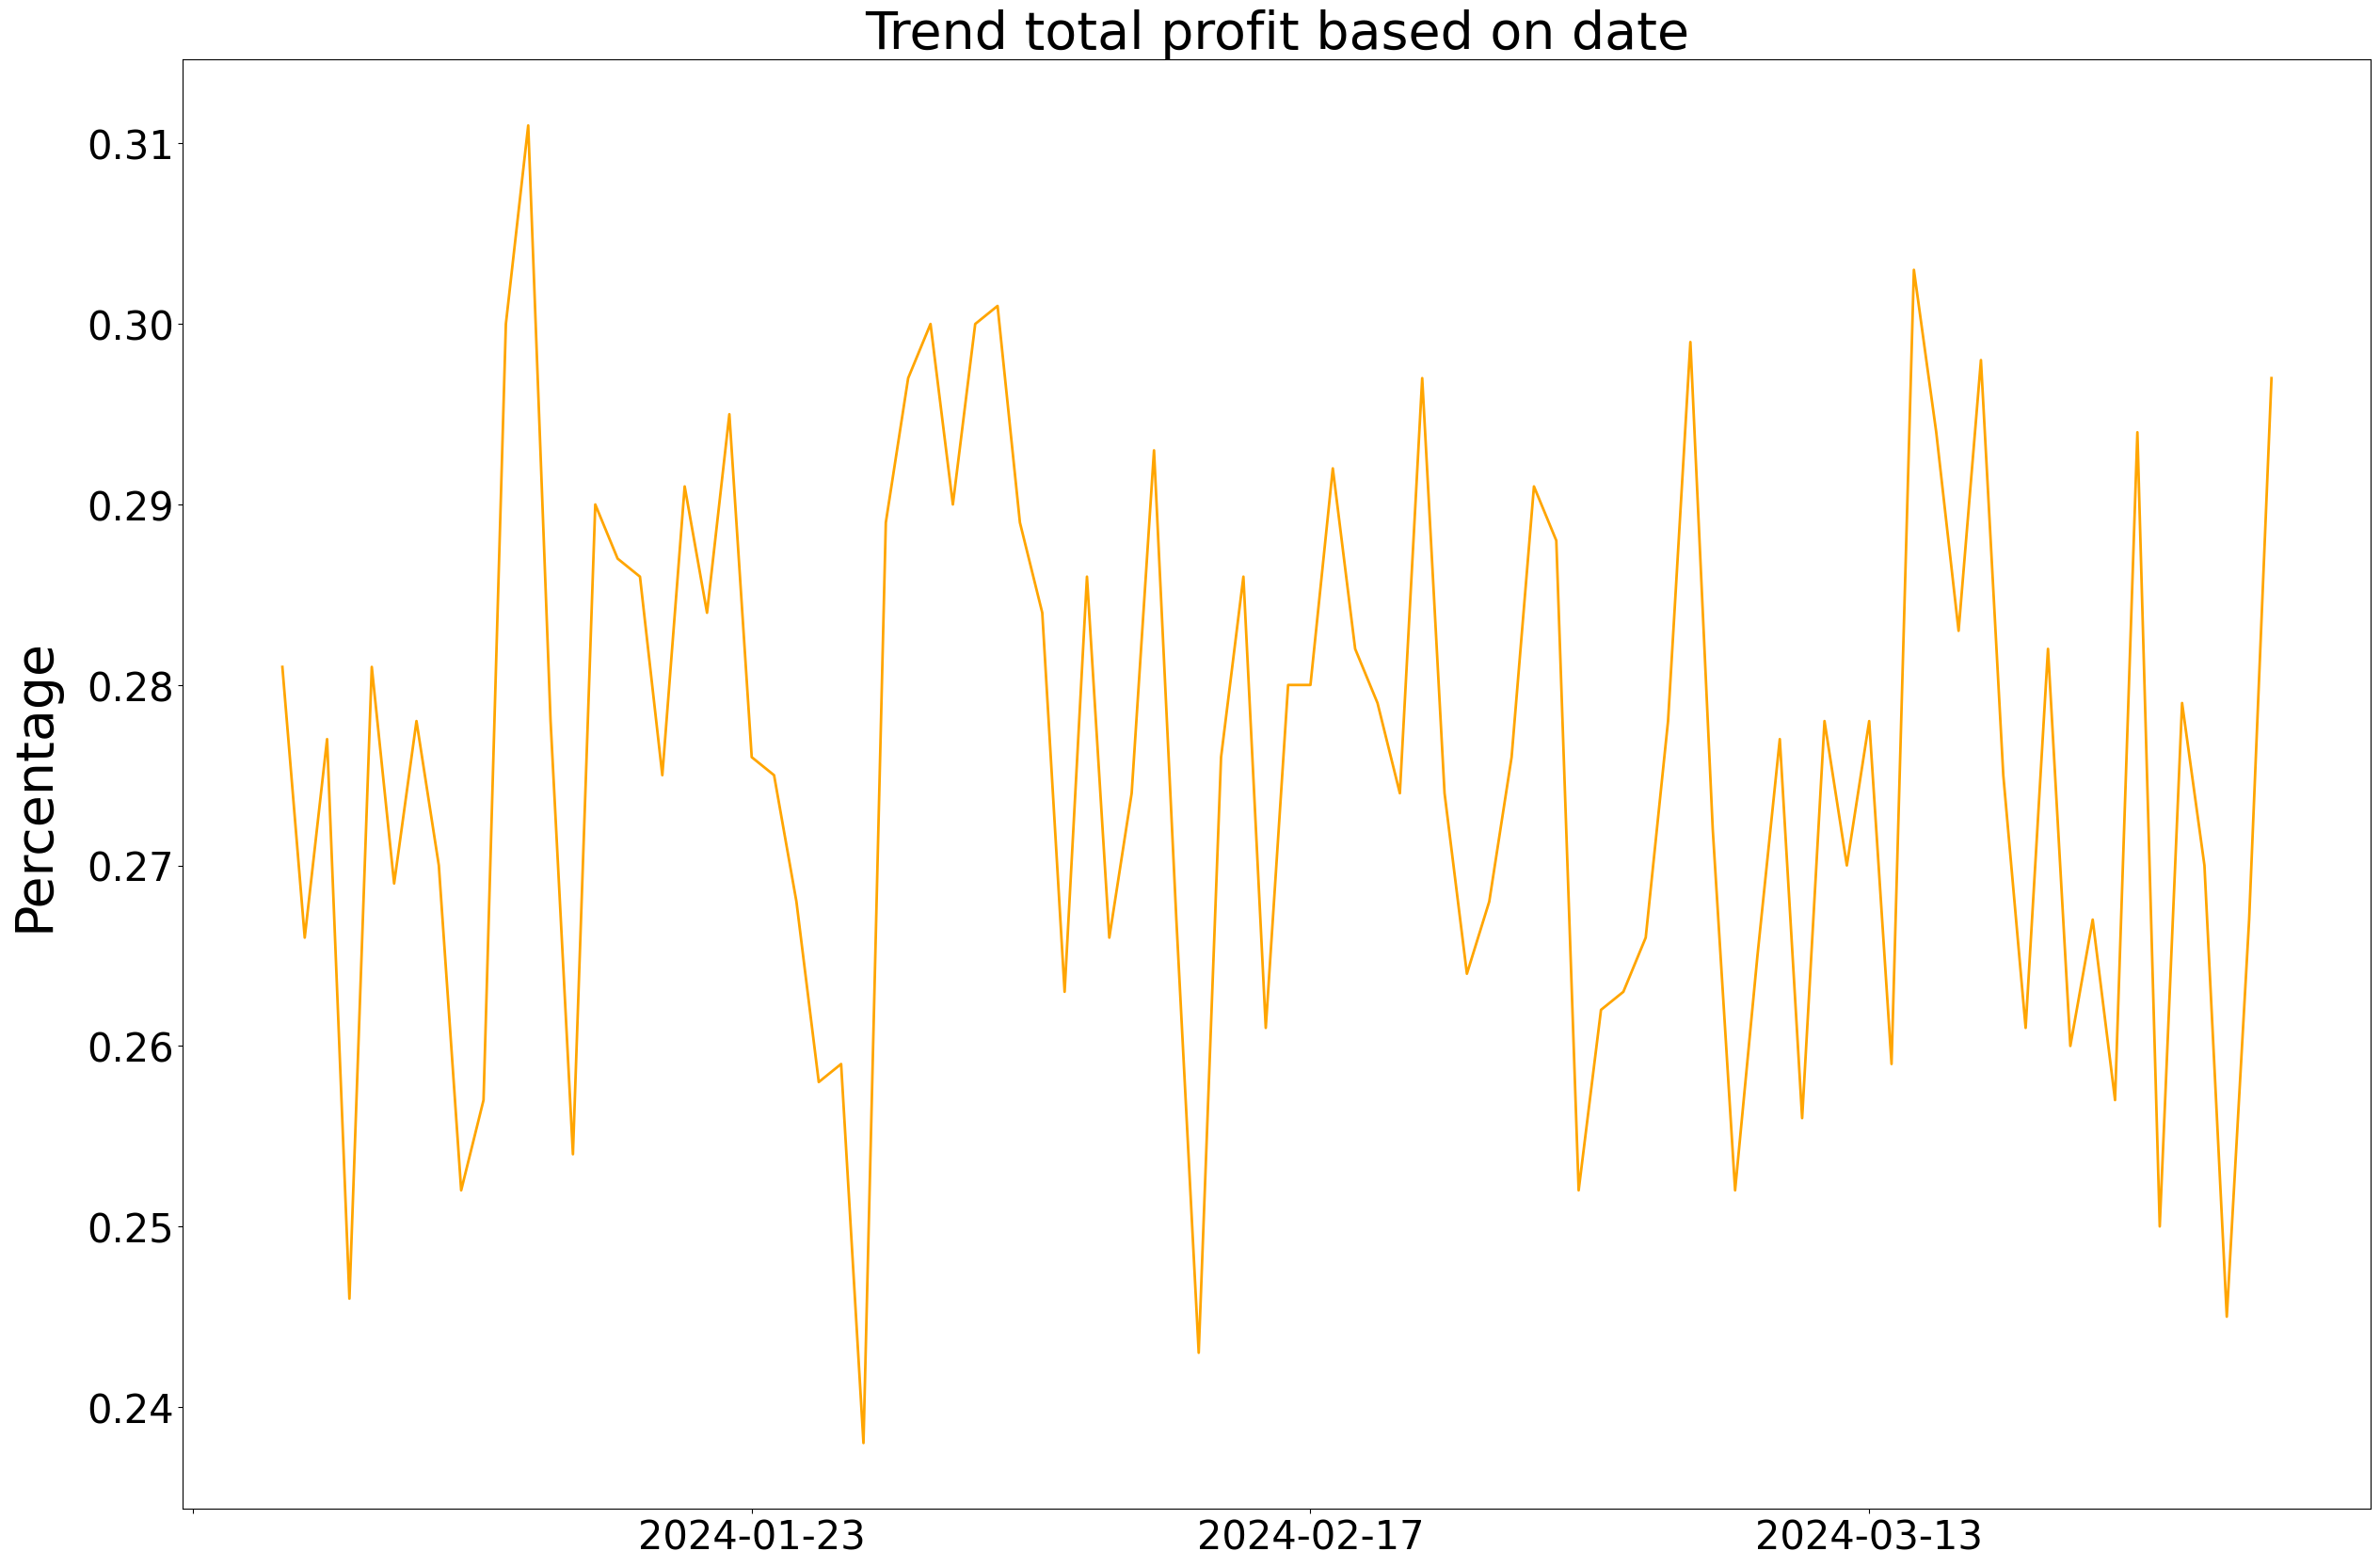

In [501]:
plt.figure(figsize=(30,20))
plt.plot(trend_amount2024['month'].astype(str), trend_amount2024['totalamount(%)'], color='orange', linewidth=2)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=25))

plt.title('Trend total profit based on date', fontsize=40)
# plt.xlabel('Date', fontsize=40)
plt.ylabel('Percentage', fontsize=40)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.yaxis.labelpad = 20

The profit generated from customer transactions is expressed as a percentage. The highest sales profit occurred in January.

Fluctuating periods can be caused by a variety of factors; the January period has the highest profits because it coincides with the New Year and Christmas holidays, which cause an increase in people's spending.

## Stage 2

### Modeling

In [502]:
df_retail.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.080,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677,455.863
1,993229,C,4,75.195,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121,258.307
2,579675,A,8,31.529,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.944,212.016
3,799826,D,5,98.880,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686,461.344
4,121413,A,7,93.189,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030,626.030


In [503]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


In [504]:
#mapping 
encoded_data = df_retail.copy()
product_mapping = {'A': 0, 
                   'B': 1, 
                   'C': 2, 
                   'D': 3}
encoded_data['ProductID'] = encoded_data['ProductID'].map(product_mapping)

category_mapping = {'Books': 0, 
                    'Clothing': 1, 
                    'Electronics': 2, 
                    'Home Decor': 3}
encoded_data['ProductCategory'] = encoded_data['ProductCategory'].map(category_mapping)

payment_mapping = {'Cash': 0, 
                   'Credit Card': 1, 
                   'Debit Card': 2,
                   'PayPal': 3}
encoded_data['PaymentMethod'] = encoded_data['PaymentMethod'].map(payment_mapping)


In [505]:
encoder = encoded_data.drop(['CustomerID', 'TransactionDate', 'StoreLocation'], axis=1)
encoder.head()

,ProductID,Quantity,Price,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount
0,2,7,80.080,0,0,18.677,455.863
1,2,4,75.195,0,3,14.121,258.307
2,0,8,31.529,0,0,15.944,212.016
3,3,5,98.880,3,0,6.686,461.344
4,0,7,93.189,0,2,4.030,626.030


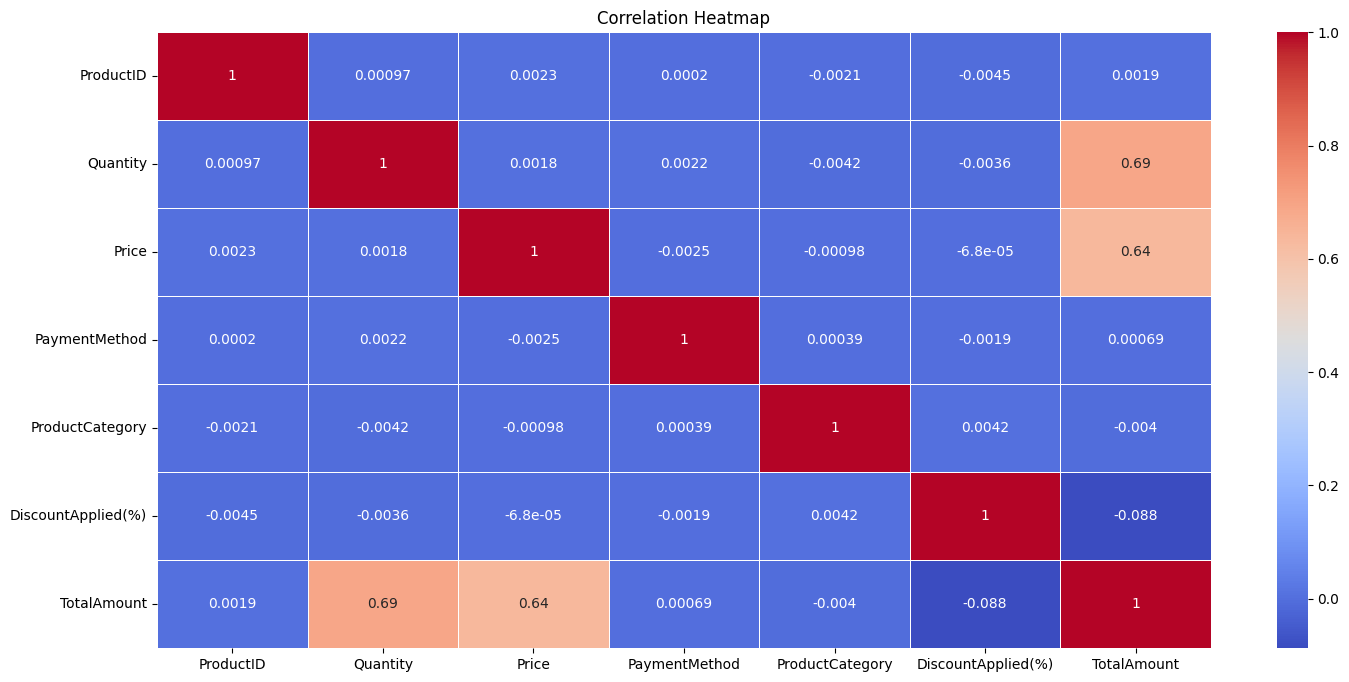

In [506]:
# Plotting the correlation heatmap
plt.figure(figsize=(17, 8))  # Adjust the figure size if needed
sns.heatmap(encoder.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [507]:
X = encoder.drop(['TotalAmount'], axis=1)
y = encoder['TotalAmount']

In [519]:
def evaluate_model(model, X, y, test_size=0.2, random_state=42):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Standardize the features
    st_x = StandardScaler()
    X_train = st_x.fit_transform(X_train)
    X_test = st_x.transform(X_test)

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Mean Absolute Error (Train)': mean_absolute_error(y_train, X_train_prediction),
        'Mean Squared Error (Train)': mean_squared_error(y_train, X_train_prediction),
        'Root Mean Squared Error (Train)': mean_squared_error(y_train, X_train_prediction, squared=False),
        'R² Score (Train)': r2_score(y_train, X_train_prediction),
        'Mean Absolute Error (Test)': mean_absolute_error(y_test, X_test_prediction),
        'Mean Squared Error (Test)': mean_squared_error(y_test, X_test_prediction),
        'Root Mean Squared Error (Test)': mean_squared_error(y_test, X_test_prediction, squared=False),
        'R² Score (Test)': r2_score(y_test, X_test_prediction)
    }

    return metrics

In [520]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Example dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# List of models
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SupportVectorRegressor': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}:")
    metrics = evaluate_model(model, X, y)
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()  # Newline for better readability


Evaluating RandomForestRegressor:
Mean Absolute Error (Train): 6.141253956031204
Mean Squared Error (Train): 105.55224909972512
Root Mean Squared Error (Train): 10.273862423632366
R² Score (Train): 0.9910404300486176
Mean Absolute Error (Test): 10.300281970050055
Mean Squared Error (Test): 223.9773440866964
Root Mean Squared Error (Test): 14.965872647015823
R² Score (Test): 0.9760961328921113

Evaluating LinearRegression:
Mean Absolute Error (Train): 0.08257011701953422
Mean Squared Error (Train): 0.010548450729906182
Root Mean Squared Error (Train): 0.10270565091515745
R² Score (Train): 0.9999991046180162
Mean Absolute Error (Test): 0.09667801070655942
Mean Squared Error (Test): 0.015462772689490858
Root Mean Squared Error (Test): 0.12434939762415763
R² Score (Test): 0.9999983497435199

Evaluating SupportVectorRegressor:
Mean Absolute Error (Train): 79.03435398420781
Mean Squared Error (Train): 9829.273520792343
Root Mean Squared Error (Train): 99.14269272514412
R² Score (Train): 0.16

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '